In [97]:
import pandas as pd
import numpy as np
import klib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [98]:
df = pd.read_csv(r'C:\Users\Yash\python Workspace\googleplaystoredata.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [99]:
df = klib.data_cleaning(df, convert_dtypes=False)

Shape of cleaned data: (10358, 13) - Remaining NAs: 1478


Dropped rows: 483
     of which 483 duplicates. (Rows (first 150 shown): [229, 236, 239, 256, 261, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 286, 287, 288, 289, 290, 291, 292, 296, 381, 394, 396, 414, 430, 431, 465, 466, 468, 469, 472, 473, 474, 475, 542, 543, 544, 545, 547, 548, 549, 550, 551, 553, 554, 556, 557, 558, 560, 561, 562, 586, 588, 665, 666, 667, 668, 671, 672, 676, 677, 678, 680, 681, 682, 683, 685, 687, 690, 695, 696, 738, 739, 746, 757, 782, 783, 785, 786, 787, 788, 792, 794, 799, 806, 819, 826, 828, 830, 831, 833, 836, 840, 842, 845, 846, 847, 898, 904, 930, 934, 935, 936, 937, 939, 940, 943, 944, 946, 947, 951, 959, 961, 962, 963, 964, 965, 966, 967, 968, 970, 972, 975, 977, 978, 979, 980, 981, 982, 983, 984, 985, 988, 992, 993, 1096, 1100])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 9
Reduced memory by at 

In [100]:
df.isnull().sum()

app                  0
category             0
rating            1465
reviews              0
size                 0
installs             0
type                 1
price                0
content_rating       1
genres               0
last_updated         0
current_ver          8
android_ver          3
dtype: int64

### Observation: 
Dataset has many missing values

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10358 entries, 0 to 10357
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app             10358 non-null  object 
 1   category        10358 non-null  object 
 2   rating          8893 non-null   float64
 3   reviews         10358 non-null  object 
 4   size            10358 non-null  object 
 5   installs        10358 non-null  object 
 6   type            10357 non-null  object 
 7   price           10358 non-null  object 
 8   content_rating  10357 non-null  object 
 9   genres          10358 non-null  object 
 10  last_updated    10358 non-null  object 
 11  current_ver     10350 non-null  object 
 12  android_ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


### Data Cleaning

In [102]:
df['reviews'].str.isnumeric().sum()

10357

### Observation:
Reviews column contains 1 non-numeric value

In [103]:
# Identifying the non numeric value
df[~df['reviews'].str.isnumeric()]

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
9990,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [104]:
# Dropping the non numeric value
df.drop(9990, inplace = True)

In [105]:
# Converting reviews datatype to int
df['reviews'] = df['reviews'].astype(int)

In [106]:
df['size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10353                   53M
10354                  3.6M
10355                  9.5M
10356    Varies with device
10357                   19M
Name: size, Length: 10357, dtype: object

In [107]:
# Cleaning the siz ecolummn:
df['size(kb)'] = df['size'].str.replace('M', '000')
df['size(kb)'] = df['size(kb)'].str.replace('k', '')
df['size(kb)'] = df['size(kb)'].replace('Varies with device', np.nan)
df['size(kb)'] = df['size(kb)'].astype(float)
df.drop('size', axis = 1, inplace = True)

In [108]:
[df['installs'].unique()]
# replace + and , sign

[array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
        '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
        '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
        '10+', '1+', '5+', '0+', '0'], dtype=object)]

In [109]:
df['price'].unique()
# replace $ sign

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

### Observations:
Installs and Price cloumns contain +,$ and , signs
We need to replace them to convert the data to numeric format

In [110]:
# replacing the signs with empty string
char_to_remove = ['+', '$', ',']

In [111]:
for char in char_to_remove:
    for cols in df[['price', 'installs']]:
        df[cols] = df[cols].str.replace(char, '')

In [112]:
# Dtype conversion
df['price'] = df['price'].astype(float)
df['installs'] = df['installs'].astype(int)

In [113]:
# Last updated column can be converted to datetime format
df['last_updated'] = pd.to_datetime(df['last_updated'])

In [114]:
# Separating the month and year from the last updated column
df['update_month'] = df['last_updated'].dt.month
df['update_year'] = df['last_updated'].dt.year
df.drop('last_updated', axis = 1, inplace=True)

In [115]:
df[df['type'].isnull()]

,app,category,rating,reviews,installs,type,price,content_rating,genres,current_ver,android_ver,size(kb),update_month,update_year
8667,Command & Conquer: Rivals,FAMILY,NaN,0,0,NaN,0.0,Everyone 10+,Strategy,Varies with device,Varies with device,NaN,6,2018


In [116]:
# Since this single value conatins multiple Nan values,and very less information, we can drop it
df.drop(8667, inplace=True)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10356 entries, 0 to 10357
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app             10356 non-null  object 
 1   category        10356 non-null  object 
 2   rating          8892 non-null   float64
 3   reviews         10356 non-null  int32  
 4   installs        10356 non-null  int32  
 5   type            10356 non-null  object 
 6   price           10356 non-null  float64
 7   content_rating  10356 non-null  object 
 8   genres          10356 non-null  object 
 9   current_ver     10348 non-null  object 
 10  android_ver     10354 non-null  object 
 11  size(kb)        8831 non-null   float64
 12  update_month    10356 non-null  int64  
 13  update_year     10356 non-null  int64  
dtypes: float64(3), int32(2), int64(2), object(7)
memory usage: 1.1+ MB


In [118]:
# Converting the Type column to boolen values of Free and Paid
df['type'] = pd.get_dummies(df['type'], drop_first=True).astype(object) 

In [119]:
import statistics
statistics.mode(df['current_ver'])

'Varies with device'

In [120]:
df['current_ver'].replace('Varies with device', np.nan, inplace=True)

In [121]:
df['current_ver'].isnull().sum()

1309

In [122]:
df['android_ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [123]:
df['android_ver'].isnull().sum()

2

In [124]:
df['android_ver'] = df['android_ver'].str.split(' ').str[0].replace(['W', 'Varies with device', 'Varies'],'')

In [125]:
df.head()

,app,category,rating,reviews,installs,type,price,content_rating,genres,current_ver,android_ver,size(kb),update_month,update_year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,0,0.0,Everyone,Art & Design,1.0.0,4.0.3,19000.0,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,0,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3,14000.0,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,5000000,0,0.0,Everyone,Art & Design,1.2.4,4.0.3,8.7,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,50000000,0,0.0,Teen,Art & Design,NaN,4.2,25000.0,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,100000,0,0.0,Everyone,Art & Design;Creativity,1.1,4.4,2.8,6,2018


## EDA 

In [126]:
df[df.duplicated('app')].shape

(698, 14)

In [127]:
# Dropping the duplicate values
df = df.drop_duplicates(subset=['app'], keep='first')

In [128]:
df.shape

(9658, 14)

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9658 entries, 0 to 10357
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app             9658 non-null   object 
 1   category        9658 non-null   object 
 2   rating          8196 non-null   float64
 3   reviews         9658 non-null   int32  
 4   installs        9658 non-null   int32  
 5   type            9658 non-null   object 
 6   price           9658 non-null   float64
 7   content_rating  9658 non-null   object 
 8   genres          9658 non-null   object 
 9   current_ver     8596 non-null   object 
 10  android_ver     9656 non-null   object 
 11  size(kb)        8432 non-null   float64
 12  update_month    9658 non-null   int64  
 13  update_year     9658 non-null   int64  
dtypes: float64(3), int32(2), int64(2), object(7)
memory usage: 1.0+ MB


In [130]:
#Identifying the numeric and categorical features from the dataset
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype =='O']          

In [131]:
print(numeric_features,categorical_features) 

['rating', 'reviews', 'installs', 'price', 'size(kb)', 'update_month', 'update_year'] ['app', 'category', 'type', 'content_rating', 'genres', 'current_ver', 'android_ver']


In [132]:
#Getting proportions of data count in categorical values
for col in categorical_features:
    print(df[col].value_counts(normalize = True)*100)
    print('------------------------------------------')

Photo Editor & Candy Camera & Grid & ScrapBook    0.010354
Company Kitchen Inventory                         0.010354
CK Pharmacies                                     0.010354
INFAMY RO                                         0.010354
CK Call NEW                                       0.010354
                                                    ...   
Bike Race Free - Top Motorcycle Racing Games      0.010354
Dance School Stories - Dance Dreams Come True     0.010354
3D Bowling                                        0.010354
Mind Games Pro                                    0.010354
iHoroscope - 2018 Daily Horoscope & Astrology     0.010354
Name: app, Length: 9658, dtype: float64
------------------------------------------
FAMILY                 18.958376
GAME                    9.929592
TOOLS                   8.562849
BUSINESS                4.348726
MEDICAL                 4.089874
PERSONALIZATION         3.893146
PRODUCTIVITY            3.872437
LIFESTYLE               3.820667
FINA

## Visualization

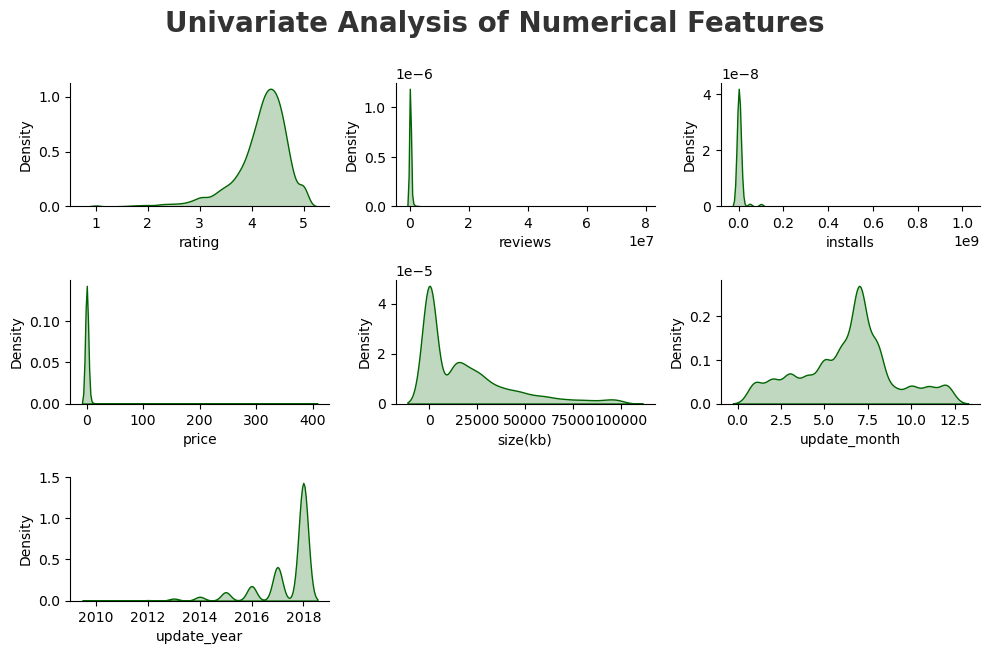

In [133]:
#Visualization of numerical features
plt.figure(figsize = (10,10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize = 20, fontweight = 'bold', alpha = 0.8, y = 1)

for i in range(0, len(numeric_features)):
    plt.subplot(5,3, i+1)
    sns.kdeplot(x = df[numeric_features[i]], shade = True, color = 'darkgreen')
    sns.despine()
    plt.xlabel(numeric_features[i])
    plt.tight_layout()
    

### Observation:
Rating and year is left skewed while reviews, size, installs and price are right skewed

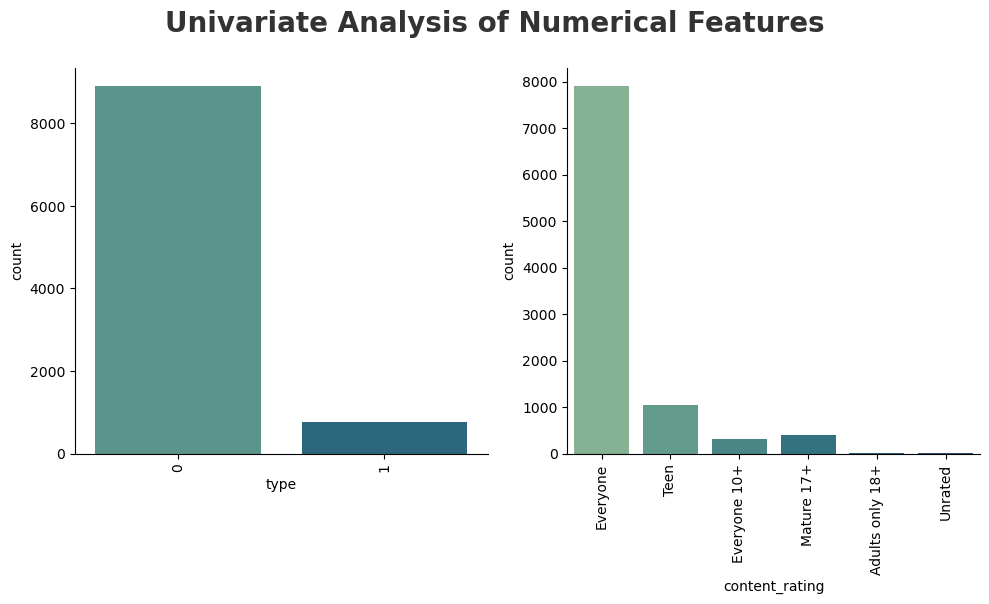

In [134]:
# Visualization of categorical features
plt.figure(figsize = (10,10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize = 20, fontweight = 'bold', alpha = 0.8, y = 1)
category= ['type', 'content_rating']

for i in range(0, len(category)):
    plt.subplot(2,2, i+1)
    sns.countplot(x = df[category[i]], palette = 'crest')
    sns.despine()
    plt.xlabel(category[i])
    plt.xticks(rotation = 90)
    plt.tight_layout()
    

<AxesSubplot: ylabel='category'>

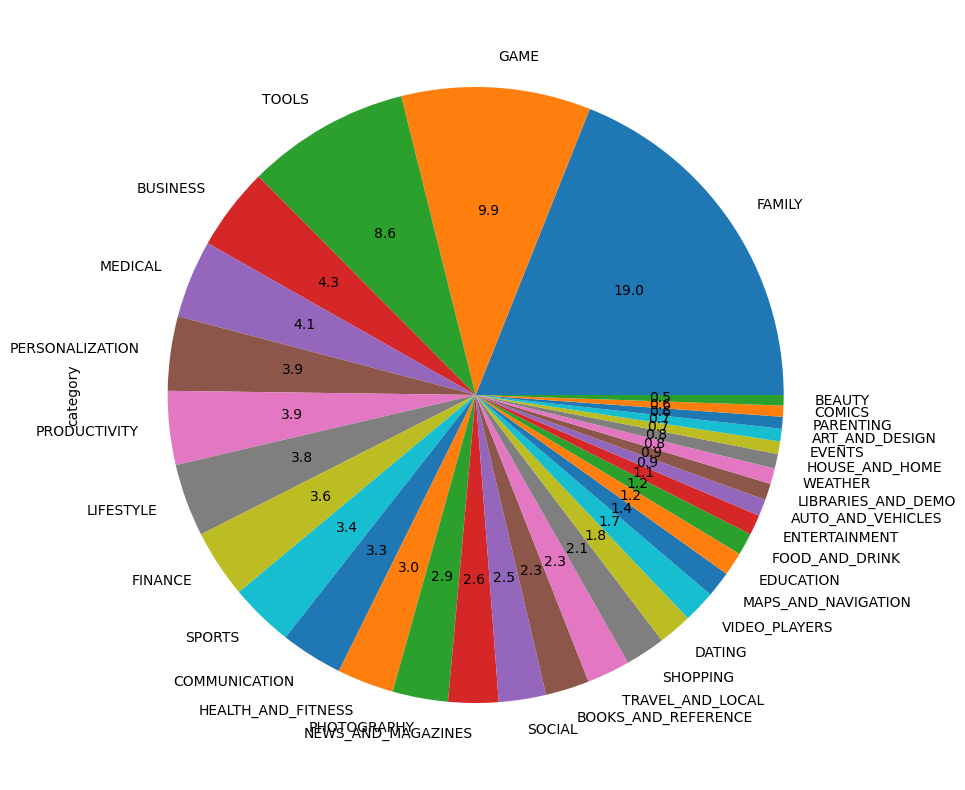

In [135]:
df['category'].value_counts().plot.pie(y = df['category'], figsize = (15, 10), autopct = '%1.1f' )

### Observation : 
Family, games and tools are the most popular categories<br>
Beauty, comics and parenting are least popular

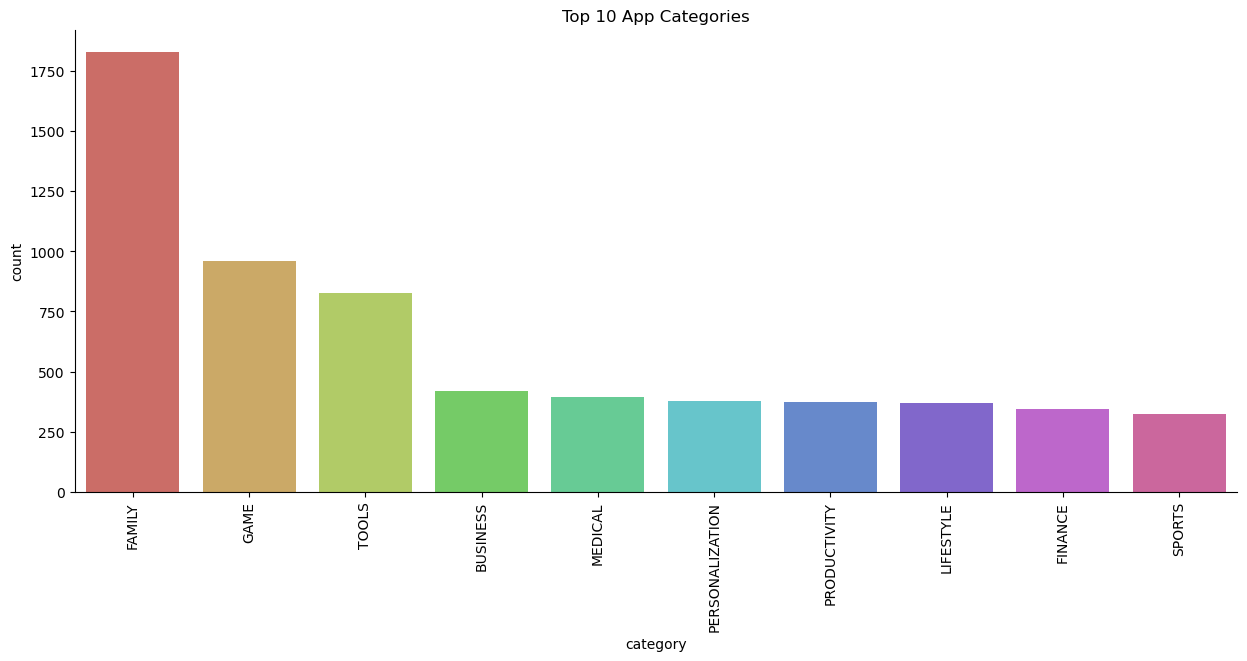

In [136]:
# Top 10 App Categories

top_categories = df['category'].value_counts().head(10)
plt.figure(figsize = (15,6))
sns.countplot(x = df['category'], order = top_categories.index, palette = 'hls', )
plt.title("Top 10 App Categories")
plt.xticks(rotation = 90)
sns.despine()
plt.show()

### Observation:
Family and Game are 2 most famous categories with most number of apps

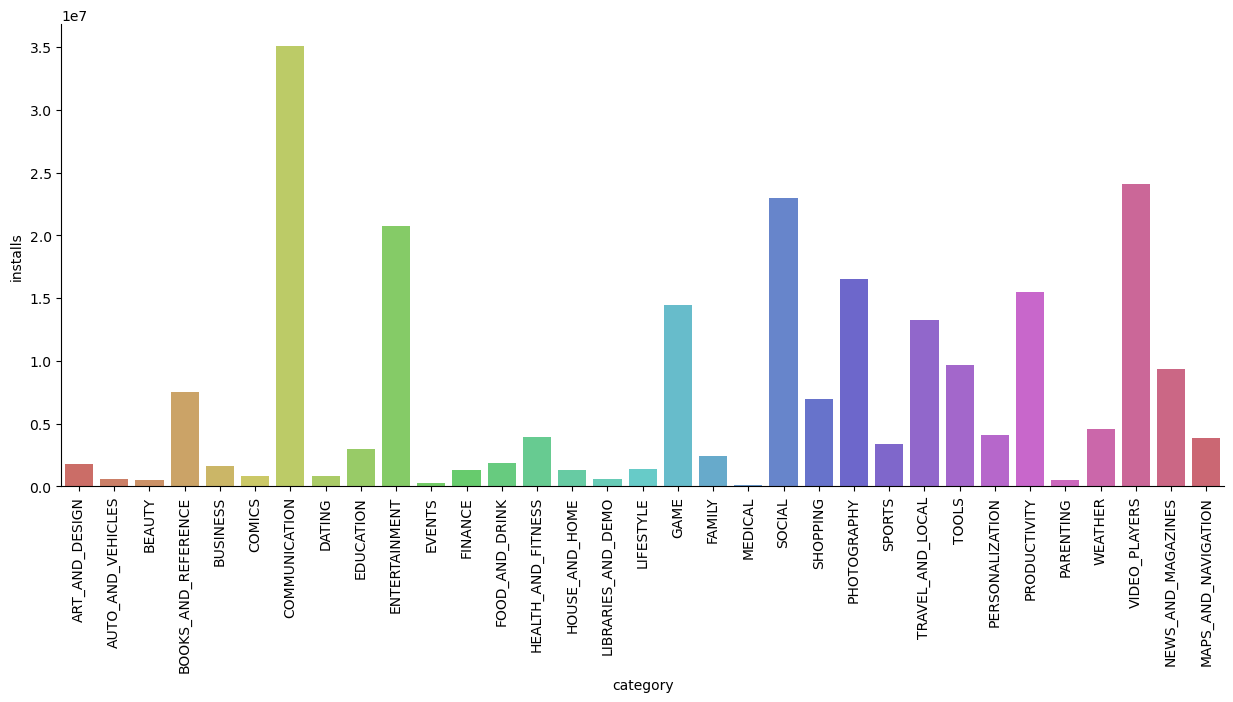

In [137]:
plt.figure(figsize= (15,6))
sns.barplot(df, x = 'category' ,y = 'installs', palette='hls', ci = None)
plt.xticks(rotation = 90)
sns.despine()
plt.show()

### Observation : 
WE can see that Communication category has the highest number of installs followed by the Video Players

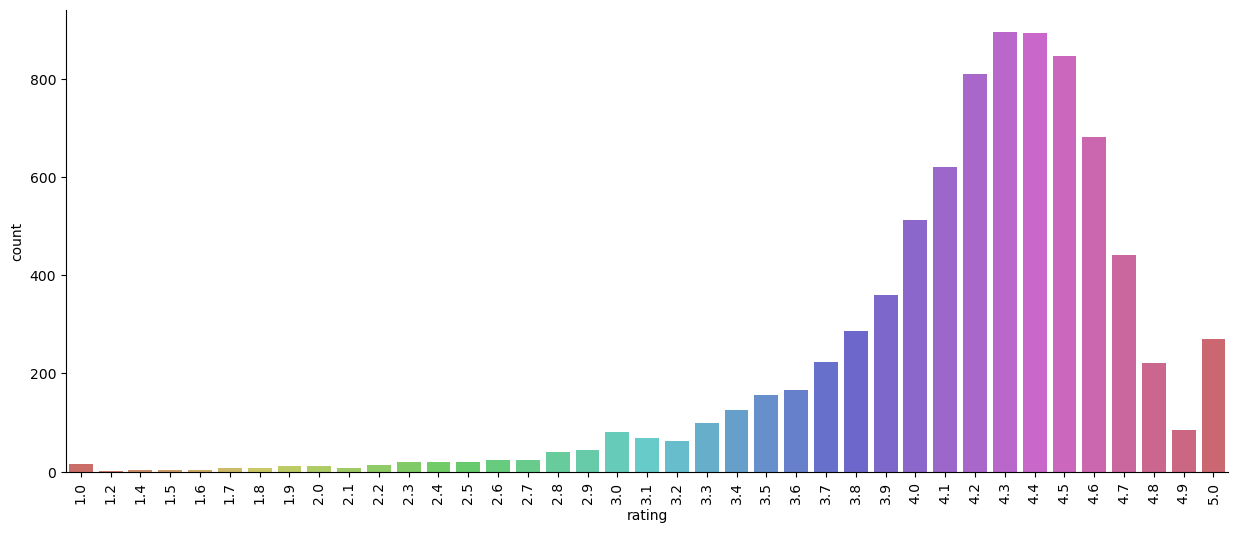

In [138]:
plt.figure(figsize= (15,6))
sns.countplot(df, x= 'rating', palette = 'hls')
plt.xticks(rotation = 90)
sns.despine()

plt.show()

<AxesSubplot: ylabel='rating'>

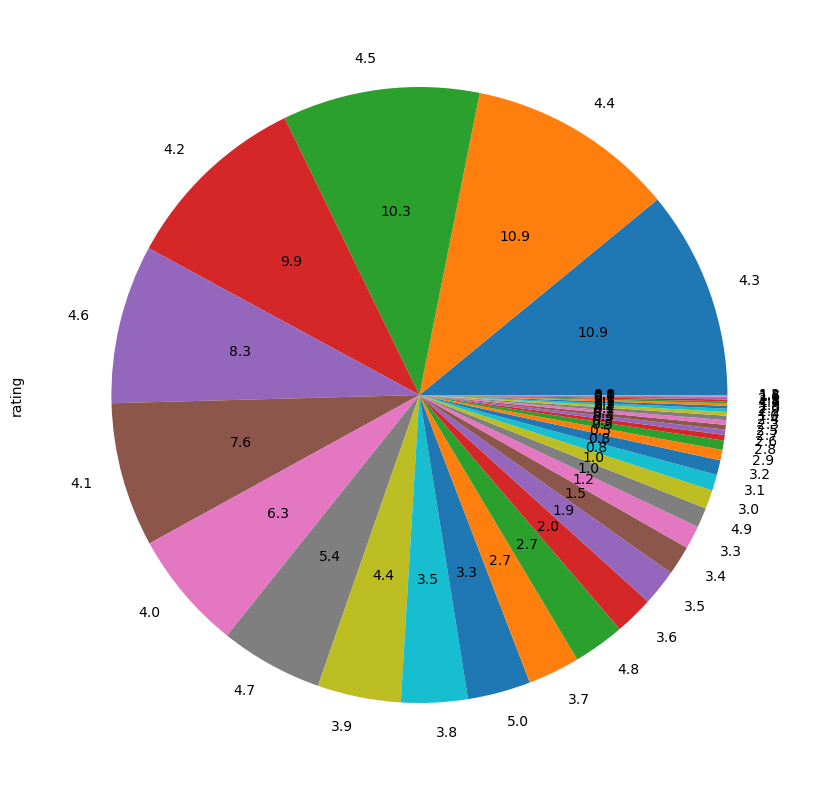

In [139]:
df['rating'].value_counts().plot.pie(y = df['rating'], figsize = (15, 10), autopct = '%1.1f' )

### Observation: 
Most apps have 4.3 and 4.4 ratings      
Approx 200 apps have 5 rating    

In [140]:
# Saving as csv file
df.to_csv('Google_data_cleaned.csv')